In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import oauth2 as oauth
import twitter
import tweepy
import time

import nltk
import re
import string
from collections import Counter
from wordcloud import WordCloud
from textblob_de import TextBlobDE
from sklearn.feature_extraction.text import CountVectorizer
from gensim import matutils, models
import scipy.sparse

nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sched\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sched\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sched\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

<b>Analysing the twitter feed of Norbert Bolz via NLP methods</b>

Norbert Bolz is a retired German professor for Media and Communication science. In recent years he has recieved a lot of public attention in the German mainstream media mainly through his publications on social and philosophical topics and his position as a right conservative intellectual. Given the importance of Bolz's tweets for his general public reception I will be scraping Bolz's 4000 most recent tweets and run some different NLP analysis on them in order to identify certain key topics and other references, which are frequently made in said tweets.

<b>Scraping & Cleaning the data</b>

In [2]:
api_key = "X"
api_secret = "X"
access_token_key = "X"
access_token_secret = "X"

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token_key, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [14]:
tweets = []

def username_tweets_to_csv(username,count):
    try:      
        tweets = tweepy.Cursor(api.user_timeline,id=username).items(count)

        tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]

        tweets_df = pd.DataFrame(tweets_list,columns=['Datetime', 'Tweet Id', 'Text'])

        tweets_df.to_csv('{}-tweets.csv'.format(username), sep=',', index = False)

    except BaseException as e:
          print('failed on_status,',str(e))
          time.sleep(3)

In [17]:
username_tweets_to_csv("@NorbertBolz", 4000)

In [5]:
tweets_bolz = pd.read_csv("../Twitter-Analysis/@NorbertBolz-tweets.csv", sep =',')

In [6]:
stoplist_ger = nltk.corpus.stopwords.words('german')
stoplist_append = ['rt', 'heute', 'wer', 'gibt', 'mehr', 'the', '“', 'immer']
stoplist_ger = stoplist_ger+stoplist_append

In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub('https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,}', "", text)
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    text = re.sub('\\n', '', text)
    text = re.sub('[0-9]*', '', text)
    return text

clean = lambda x: clean_text(x)

tweets_clean = pd.DataFrame(tweets_bolz.Text.apply(clean_text))

In [8]:
tweets_clean

,Text
0,man kann freiheit nicht ohne den begriff der i...
1,wo ist marcel reif
2,rt darthputinkgb going through immigration in ...
3,das ist zwar logisch falsch aber politisch ric...
4,das grüne versprechen dass alles möglich ist w...
...,...
3240,moralfanatismus ist die bußfertigkeit der gott...
3241,gutmenschentum ist moralische selbstbefriedigu...
3242,typisch deutsch ist die frage was ist deutsch
3243,uns fehlt heute die kraft zuschauer zu bleiben


In [22]:
cv = CountVectorizer()
tweets_cv = cv.fit_transform(tweets_clean.Text)
tweets_clean2 = pd.DataFrame(tweets_cv.toarray(), columns=cv.get_feature_names())
tweets_clean2.index = tweets_clean.index
tweets_clean2

,ab,abaerbock,abbestellt,abbé,abendland,abendlandes,abendländische,abendländischer,abenteuer,aber,...,از,دست,دیدن,ذره,سطحشون,فرق,مومن,میکنه,کافر,یه
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b>Word Cloud</b>

In [9]:
string_tweets = tweets_clean.to_string(header=False, index=False, index_names=False)

In [10]:
string_token = nltk.word_tokenize(string_tweets)
string_token = [w for w in string_token if not w.lower() in stoplist_ger]

In [11]:
c = Counter(string_token)
c.most_common(30)

[('maternus', 85),
 ('politik', 78),
 ('welt', 73),
 ('gut', 72),
 ('politische', 71),
 ('menschen', 69),
 ('freiheit', 62),
 ('deutschen', 59),
 ('grünen', 57),
 ('schon', 56),
 ('politischen', 56),
 ('gesellschaft', 56),
 ('merkel', 56),
 ('deutschland', 54),
 ('wäre', 51),
 ('frau', 49),
 ('linken', 48),
 ('problem', 44),
 ('spd', 43),
 ('macht', 42),
 ('leben', 41),
 ('deutsche', 40),
 ('politisch', 39),
 ('angst', 39),
 ('medien', 39),
 ('einfach', 39),
 ('rechts', 38),
 ('linke', 37),
 ('aufklärung', 36),
 ('wahrheit', 36)]

In [12]:
words = ' '.join(string_token)
wordcloud = WordCloud(width=1600, height=400).generate(words)

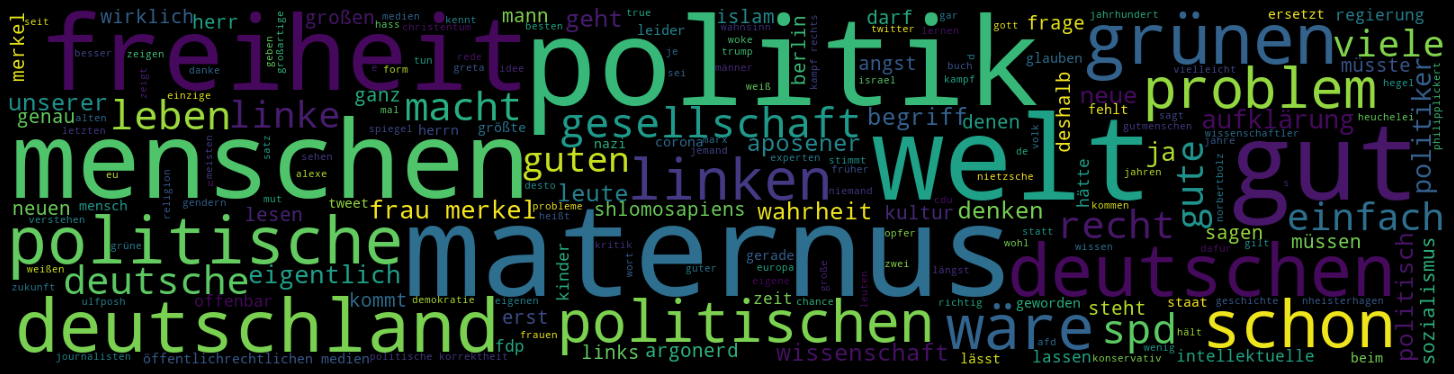

In [13]:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<b>Unique words</b>

In [14]:
unique = [w for w in string_token if c[w] == 1]
len(unique)

6421

<b>Sentiment analysis</b>

In [15]:
pol = lambda x: TextBlobDE(x).sentiment.polarity
sub = lambda x: TextBlobDE(x).sentiment.subjectivity

tweets_clean['polarity'] = tweets_clean['Text'].apply(pol)
tweets_clean['subjectivity'] = tweets_clean['Text'].apply(sub)

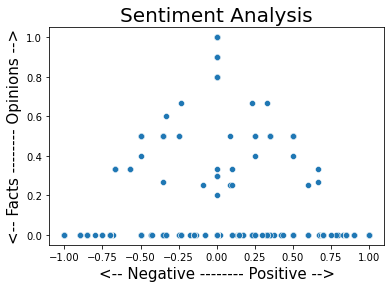

In [17]:
sb.scatterplot(data=tweets_clean, x="polarity", y="subjectivity")
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
plt.show()

<b>Topic modeling</b>

In [50]:
sparse_counts = scipy.sparse.csr_matrix(tweets_clean2)
corpus = matutils.Sparse2Corpus(sparse_counts)
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=100)
lda.print_topics()

[(0,
  '0.002*"beenden" + 0.002*"gegenderte" + 0.002*"ideologie" + 0.002*"gekleidet" + 0.002*"gegenargument" + 0.002*"geirrt" + 0.002*"fehlalarm" + 0.002*"elt" + 0.002*"fünfte" + 0.002*"einfacher"'),
 (1,
  '0.002*"electionresults" + 0.002*"entsetzens" + 0.002*"führungsduo" + 0.001*"buches" + 0.001*"diskriminierungs" + 0.001*"bocuse" + 0.001*"faz" + 0.001*"institution" + 0.001*"darunter" + 0.001*"gemeldet"'),
 (2,
  '0.001*"indigniertheit" + 0.001*"betreute" + 0.001*"ironisch" + 0.001*"alternative" + 0.001*"infektionsschutzregeln" + 0.001*"biology" + 0.001*"frühromantiker" + 0.001*"einzuschlafen" + 0.001*"infinitesimalmathematik" + 0.001*"greifenden"')]

The topic analysis shows that themes such as criticising and mocking the leftist elite make a frequent occurence in Bolz's tweets. Furthermore these critiques on Bolz's "political enemies" are often accompanied by references to political discourses of the present Zeitgeist such as the Covid pandemic, gender differences and other topics regarding the struggle for equality.

<b>Distribution of specific words</b>

In [66]:
expression = 'grüne'
pos = 0 
positions = []

while pos != -1:
    position = string_tweets.find(expression,pos+1)
    pos = position
    positions.append(position)
positions.pop()
print('The expression is found {} times'.format(len(positions)))
print(positions)

The expression is found 89 times
[633, 2055, 5751, 10494, 15923, 16922, 18682, 23552, 28651, 44990, 53911, 56241, 63336, 63485, 63817, 66479, 90382, 90773, 97279, 97782, 104899, 114787, 126532, 132475, 141747, 149562, 149768, 154682, 155533, 168389, 174338, 174504, 177091, 177475, 178340, 180570, 188612, 189668, 193047, 215583, 225460, 225475, 236504, 243254, 257821, 271955, 296417, 297901, 304409, 304902, 307153, 307525, 307853, 310337, 311885, 317180, 327116, 335774, 337499, 339582, 346895, 354411, 358721, 365004, 367059, 367895, 368127, 368268, 369553, 375256, 379161, 386219, 386330, 388793, 389429, 389978, 393153, 395111, 395312, 398327, 401126, 403649, 411401, 414874, 418489, 419431, 435153, 435710, 451151]


In [67]:
window = 18
for position in positions[0:20]:
    print(string_tweets[position - window:position + window + len(expression)].strip())

das grüne versprechen dass
besendung für die grünen  eine interessan
guten
       die grünen zeigen wie erfol
er  bolschewiken  grüne
ropaganda für die grünen betreiben und de
rd lustig mit der grünen kanzlerin
die grünen puritaner kennen
rote und grüne haben sich ja län
n gerade weil die grünen unser bestes wol
die grünen sind entweder wa
t euch
           grüne und linke können
der grüne zeitgeist säkular
das programm der grünen am meisten freue
kein wähler der grünen wird ihr program
n im programm der grünen “interessantes“
dass man sich die grünen leisten kann
die grüne priesterherrschaf
die grünen sind durch und d
grüner tugendterror
es gäbe keine grünen mehr wenn man si


In [68]:
string_token2 = nltk.Text(string_token)
string_token2.concordance(expression.lower(), width=120, lines=20)

Displaying 15 of 15 matches:
occupationme no just h… logisch falsch politisch richtig grüne versprechen möglich berlin eingelöst goethe dumme sätze 
pen heiligen aktivismus puritaner jakobiner bolschewiken grüne linken extrem antimarxistisch setzen lumpenproletariat m
uelle früher daran gearbeitet stämmen nationen for… rote grüne ja längst gefunden konservativen liberalen begriffen… st
 neue kommunistische manifest fanatiker länder vereinigt grüne linke abgründe inkompetenz offenbaren wähler nachdenken 
 tabuisiert bestimmte gedanken falsch unakzeptabel denkt grüne zeitgeist säkularer puritanismus trade off freiheit glei
esse intelligenter… schlimmer rodeln aposener lauterbach grüne priesterherrschaft wasser predigen wein trinken politisc
lt herrn edenhofer wissen steht avantgarde angst kapitel grüne papst what laschet herr merkel endgültige kommentar them
licher bevormundung vermittelt große koalition folge fdp grüne linke oppositionsparteien gelähmt gedanke… lieber herr p
achhaltigke

In [69]:
expression = 'klima'
pos = 0 
positions = []

while pos != -1:
    position = string_tweets.find(expression,pos+1)
    pos = position
    positions.append(position)
positions.pop()
print('The expression is found {} times'.format(len(positions)))
print(positions)

The expression is found 43 times
[21487, 22225, 35899, 62148, 67653, 75208, 83568, 104472, 125872, 145388, 146056, 186852, 216503, 303436, 304534, 310210, 332208, 346191, 346601, 348098, 349080, 350130, 353043, 353657, 354504, 364088, 364517, 364814, 369103, 369570, 375735, 381031, 381723, 382955, 383782, 384069, 388817, 393627, 399912, 413628, 414318, 444300, 451250]


In [70]:
window = 18
for position in positions[0:20]:
    print(string_tweets[position - window:position + window + len(expression)].strip())

kälter ist als es klimawandelwissenschaft
rt maternus klimalockdown ick hör d
das problem des klimawandels kann man w
klar machen dass klimawand…
vor der klimakatastrophe warnen
was klimaaktivisten coronah
thusiasmus  heute klimawandel
corona klima und massenmigrati
ichte
    wie der klimawandel inspiriert
en hat nichts mit klima und corona zu tun
nach dem klimaleugnern und coron
wer kinder für klimaschädlich hält mus
artikel über ein »klima der einschüchteru
hwänzer gegen das klima demonstrieren jub
genau wie der klimawandel wird auch d
ovid umweltschutz klimaschutz nannystaats
terror migration klima virus
berhitzte meinungsklima die radikalisieru
ersity gender und klimanotstand in den ka
listische meinungsklima zerstört jede mot


In [71]:
string_token2.concordance(expression.lower(), width=120, lines=20)

Displaying 6 of 6 matches:
seidl gehören argonerd deutsche reiter apokalypse corona klima massenmigration politischmedialen elite probleme präsent
richtig stellen wohl fdp wählen politische krise stecken klima corona tun totalen ohnmacht parlaments politiker schlimm
n😡 zugeben schlecht argonerd stunden warnenden artikel » klima einschüchterung « deutschen schulen schnell haltungsjour
nheimer erst duden lenin pietbull unreife schulschwänzer klima demonstrieren jubelt presse wehe erwachsene steuerzahlen
hnt fall mauer zeitalter angst begonnen terror migration klima virus gesellschaftliche leben still steht zeit großen al
t welt freund feind carl schmitt hände reiben politische klima deutschland gutes symbol geßlerhut politischen diskussio
